In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Check for GPU availability
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
train_dir = r"C:\Users\anshi\Downloads\Covid19_dataset\Covid19-dataset\train"
test_dir = r"C:\Users\anshi\Downloads\Covid19_dataset\Covid19-dataset\test"
img_width, img_height = 150, 150
batch_size = 32

# Create common directories for train and test images
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)


Num GPUs Available:  0
Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Print model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)     

Epoch 1/20


6/6 [==============================] - 12s 2s/step - loss: 1.2140 - accuracy: 0.4438 - val_loss: 0.9126 - val_accuracy: 0.6875
Epoch 2/20
6/6 [==============================] - 8s 1s/step - loss: 0.6269 - accuracy: 0.8021 - val_loss: 0.3539 - val_accuracy: 0.8750
Epoch 3/20
6/6 [==============================] - 7s 1s/step - loss: 0.4235 - accuracy: 0.8343 - val_loss: 0.3177 - val_accuracy: 0.9062
Epoch 4/20
6/6 [==============================] - 7s 1s/step - loss: 0.3063 - accuracy: 0.8876 - val_loss: 0.7930 - val_accuracy: 0.7500
Epoch 5/20
6/6 [==============================] - 7s 1s/step - loss: 0.3475 - accuracy: 0.8698 - val_loss: 0.2303 - val_accuracy: 0.9375
Epoch 6/20
6/6 [==============================] - 7s 1s/step - loss: 0.1984 - accuracy: 0.9349 - val_loss: 0.2300 - val_accuracy: 0.9375
Epoch 7/20
6/6 [==============================] - 7s 1s/step - loss: 0.1842 - accuracy: 0.9172 - val_loss: 0.1878 - val_accuracy: 0.9375
Epoch 8/20
6/6 [======================

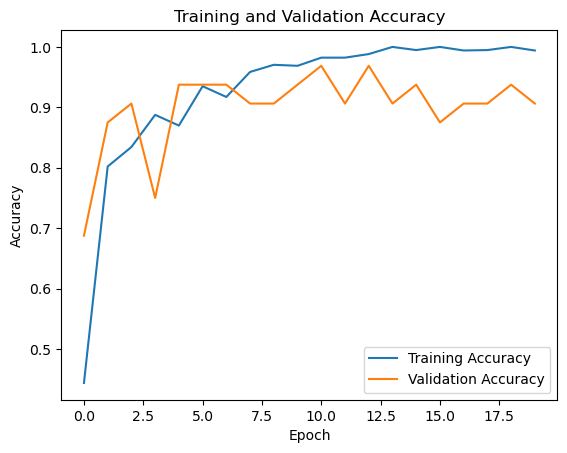

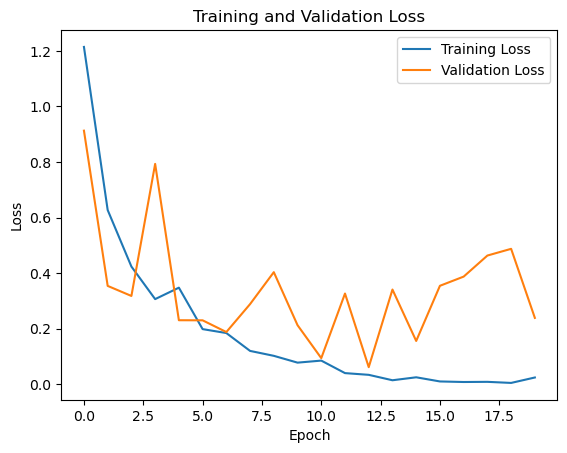

In [8]:
# Train the model
history = model.fit(train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

2/2 [==============================] - 1s 505ms/step - loss: 0.1799 - accuracy: 0.9219
Test Loss: 0.17989367246627808
Test Accuracy: 0.921875
3/3 [==============================] - 1s 258ms/step
                 precision    recall  f1-score   support

          Covid       1.00      0.96      0.98        26
         Normal       0.83      0.95      0.88        20
Viral Pneumonia       0.89      0.80      0.84        20

       accuracy                           0.91        66
      macro avg       0.90      0.90      0.90        66
   weighted avg       0.91      0.91      0.91        66



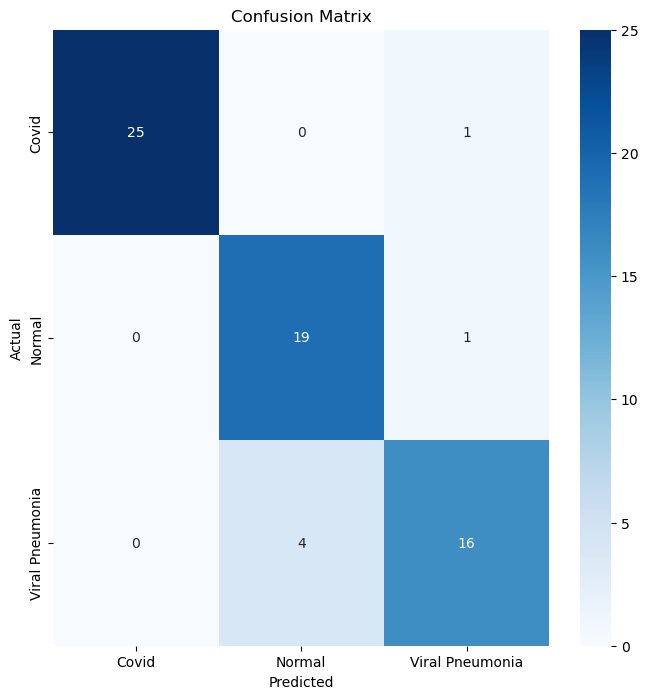

In [11]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict classes for test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes

# Generate class labels
class_labels = list(test_generator.class_indices.keys())

# Generate classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Plot confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

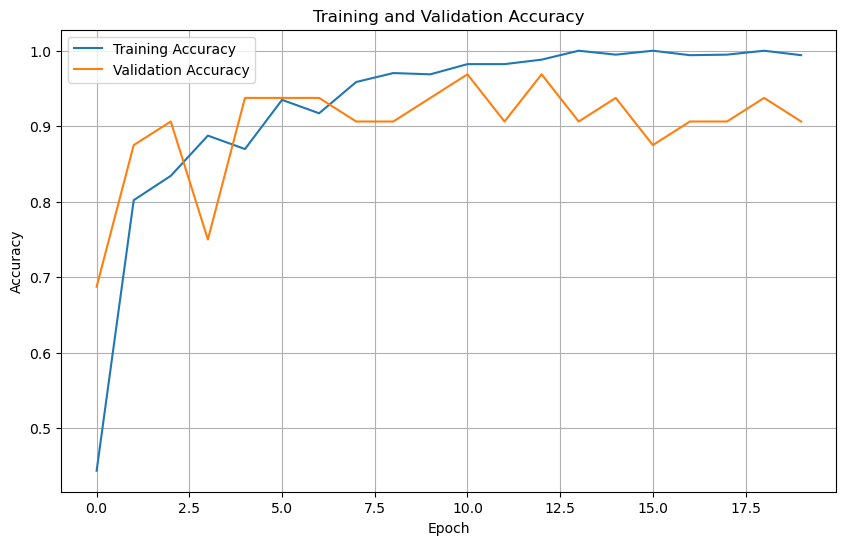

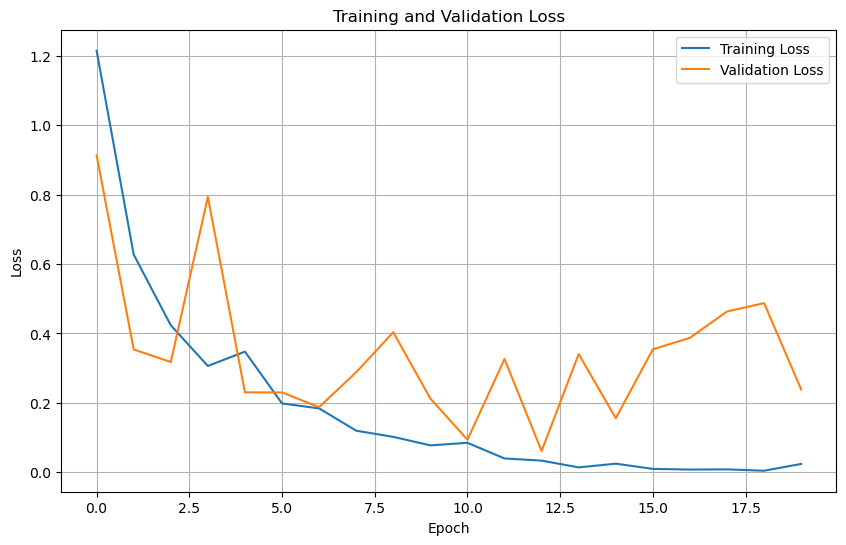

In [12]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()